It's for refreshing the changes in py files without restarting the kernel

In [76]:
import sys
import importlib
import pyLDAvis.gensim
import pyLDAvis

sys.path.append('./codes')
from codes import LDA 
from codes.LDA import classification
from codes.LDA import add_top_words_to_df
from codes.LDA import lda_and_svm_pipeline
from codes.LDA import LDA_training
from codes.LDA import display_visuals_LDA
from codes.LDA import preprocess_text
from codes.LDA import create_review_topic_matrix
import importlib
importlib.reload(LDA)

<module 'codes.LDA' from 'c:\\Users\\User\\Desktop\\INŻYNIERKA\\Diploma-Project-Sentiment-analysis-based-on-products-reviews\\codes\\LDA.py'>

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Topic modeling

Loading data

In [90]:
import pandas as pd
data = pd.read_csv('../amazon_data/Amazon_Fashion.csv')

In [11]:
# smaller for checking
data = data[~data["text"].isna()]
data = data[data['rating'] <= 1]
data = data[data['text'].apply(lambda x: len(str(x).split()) > 100)]
data.shape

(7914, 6)

In [191]:
model, texts_bow, dictionary = LDA_training(data, False, 15, 100, 1, 200)

Tokenization starting ---
Tokenization done
Numbers removed
Two letter words removed
Written-out numbers removed
Verbs removed
Lematization done
Stopwords removed
Bigrams done
Common and rare words removed
[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 3), (32, 2), (33, 1), (34, 1)], [(12, 1), (14, 1), (16, 1), (17, 2), (22, 1), (25, 1), (27, 2), (31, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 3), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 1), (75, 1), (76, 1), (77, 1), (78, 3), (79, 1), (80, 1),

In [192]:
vis = display_visuals_LDA(model, texts_bow, dictionary)
pyLDAvis.display(vis)

## Subset, in which every rating is present - p1

In [18]:
data2 = data[~data["text"].isna()]
data2 = data2[data2['text'].apply(lambda x: len(str(x).split()) > 10)]
sampled_per_rating = [data2[data2['rating'] == rating].sample(n=1, random_state=42) for rating in range(1, 6)]
required_samples = pd.concat(sampled_per_rating, axis=0)
remaining_samples = data.drop(required_samples.index).sample(n=10000 - len(required_samples), random_state=42)
final_sample = pd.concat([required_samples, remaining_samples], axis=0)
final_sample = final_sample[final_sample['text'].apply(lambda x: len(str(x).split()) > 10)]
print(final_sample['rating'].value_counts())

rating
5.0    3230
4.0    1052
1.0     860
3.0     738
2.0     540
Name: count, dtype: int64


In [32]:
model, texts_bow, dictionary = LDA_training(final_sample, True, 15, 100, 100, 100)

Tokenization starting ---
Tokenization done
Numbers removed
Two letter words removed
Written-out numbers removed
Verbs removed
Lematization done
Stopwords removed
Choosed words removed
Bigrams done
Common and rare words removed
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(2, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)], [(27, 1), (28, 1), (29, 1), (30, 1)]]
Preprocessing done
--- Model starting ---
Średnia koherencja tematów: -3.1773.
Topic 0: recommend, work, item, light, seem, money, glass, need, true, always
Topic 1: compliment, many, warm, hard, ear, best, amaze, outfit, glove, many_compliment
Topic 2: product, gift, thing, right, review, thick, hold, head, every, thank
Topic 3: small, medium, easy, happy, fine, earring, extra, glad, hit, someone
Topic 4: pair, receive, last, feel, zipper, person, already, wrong, minute, lovely
Topi

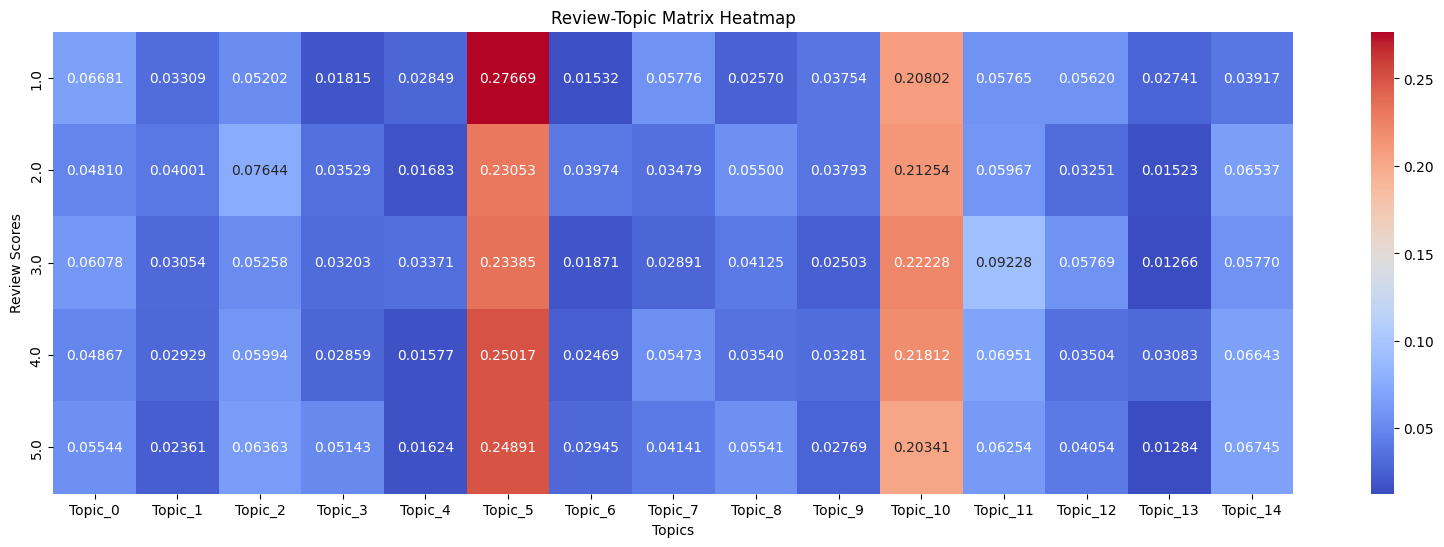

In [33]:
df01 = create_review_topic_matrix(final_sample, model, texts_bow, 15)


In [40]:
svm, vectorizer, df_with_topics_and_words = lda_and_svm_pipeline(final_sample, model, texts_bow)

---Begining SVM---
--Classification starting---
---Train test splitting---
---SVM training---
---SVM predicting---
---Classification Report:---

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           5       0.94      0.94      0.94       988
          10       0.80      0.81      0.80       295

    accuracy                           0.91      1284
   macro avg       0.43      0.44      0.44      1284
weighted avg       0.91      0.91      0.91      1284



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

In [41]:
df_with_topics_and_words0 = df_with_topics_and_words[['text', 'assigned_topic', 'top_words', 'rating']]
df_with_topics_and_words0

,text,assigned_topic,top_words,rating
579098,"I am sending it back, the clasp keeps coming o...",5,"love, fit, size, great, well, material, little...",1.0
824355,Loose peasant styles were all the thing when I...,10,"buy, look, would, really, time, price, purchas...",2.0
541961,I do not like that the shirt is not free-flowi...,5,"love, fit, size, great, well, material, little...",3.0
2347334,It’s cute and it looks a little cheap but real...,5,"love, fit, size, great, well, material, little...",4.0
545366,Absolutely gorgeous. Wearing the Galaxy on my ...,5,"love, fit, size, great, well, material, little...",5.0
...,...,...,...,...
2278315,The item was not what was pictured and I retur...,5,"love, fit, size, great, well, material, little...",1.0
975656,I love the fact that this hit has a wire sort ...,5,"love, fit, size, great, well, material, little...",5.0
633434,Great watch. I usually stick to G shocks but t...,10,"buy, look, would, really, time, price, purchas...",5.0
1483660,"The finition of the vest is not good,for this ...",5,"love, fit, size, great, well, material, little...",2.0


#### again

In [42]:
data2 = data[~data["text"].isna()]
data2 = data2[data2['text'].apply(lambda x: len(str(x).split()) > 10)]
sampled_per_rating = [data2[data2['rating'] == rating].sample(n=1, random_state=42) for rating in range(1, 6)]
required_samples = pd.concat(sampled_per_rating, axis=0)
remaining_samples = data.drop(required_samples.index).sample(n=10000 - len(required_samples), random_state=42)
final_sample = pd.concat([required_samples, remaining_samples], axis=0)
final_sample = final_sample[final_sample['text'].apply(lambda x: len(str(x).split()) > 10)]
print(final_sample['rating'].value_counts())

rating
5.0    3230
4.0    1052
1.0     860
3.0     738
2.0     540
Name: count, dtype: int64


In [61]:
model, texts_bow, dictionary = LDA_training(final_sample, True, 15, 100, 100, 100)

Tokenization starting ---
Tokenization done
Numbers removed
Two letter words removed
Written-out numbers removed
Verbs removed SMALL
Lematization done
Stopwords removed
Choosed words removed
Bigrams done
Common and rare words removed
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)], [(21, 1), (22, 1), (23, 1)]]
Preprocessing done
--- Model starting ---
Średnia koherencja tematów: -2.6701.
Topic 0: size, fit, small, top, right, tight, perfectly, medium, review, month
Topic 1: quality, good, also, day, first, bite, cheap, thin, good_quality, glass
Topic 2: large, long, enough, around, able, away, maybe, print, run, reason
Topic 3: another, bra, head, loose, sleeve, face, thank, nicely, brand, place
Topic 4: pretty, though, use, piece, absolutely, bigger, heavy, card, apart, unique
Topic 5: would, much, definitely, thing, could, however, strap, band, new, s

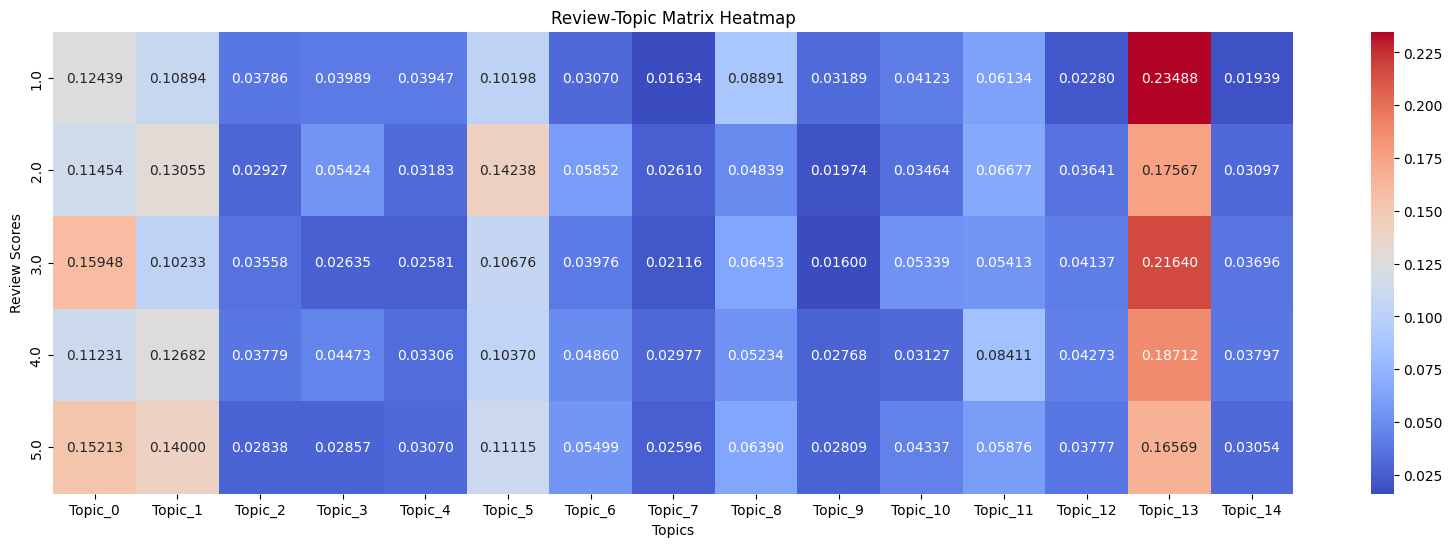

In [62]:
df01 = create_review_topic_matrix(final_sample, model, texts_bow, 15)


#### less topics, less removing rare and common words

In [72]:
model, texts_bow, dictionary = LDA_training(final_sample, True, 8, 100, 100, 100)

Tokenization starting ---
Tokenization done
Numbers removed
Two letter words removed
Written-out numbers removed
Verbs removed SMALL
Lematization done
Stopwords removed
Choosed words removed
Bigrams done
Common and rare words removed
[[(0, 1), (1, 1), (2, 1)], [(3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)], []]
Preprocessing done
--- Model starting ---
Średnia koherencja tematów: -2.4563.
Topic 0: would, nice, color, material, really, also, look, much, soft, even
Topic 1: great, fit, quality, well, good, comfortable, perfect, price, day, order
Topic 2: love, back, exactly, front, high, extra, fine, always, without, easily
Topic 3: year, old, piece, since, light, year_old, son, week, waist, every
Topic 4: size, small, large, medium, strap, band, necklace, absolutely, larger, bigger
Topic 5: pretty, long, easy, money, glass, bracelet, never, last, bad, able
Topic 6: little, cute, big, still, super, warm, new, smaller, yet, always
Topic 7: tim

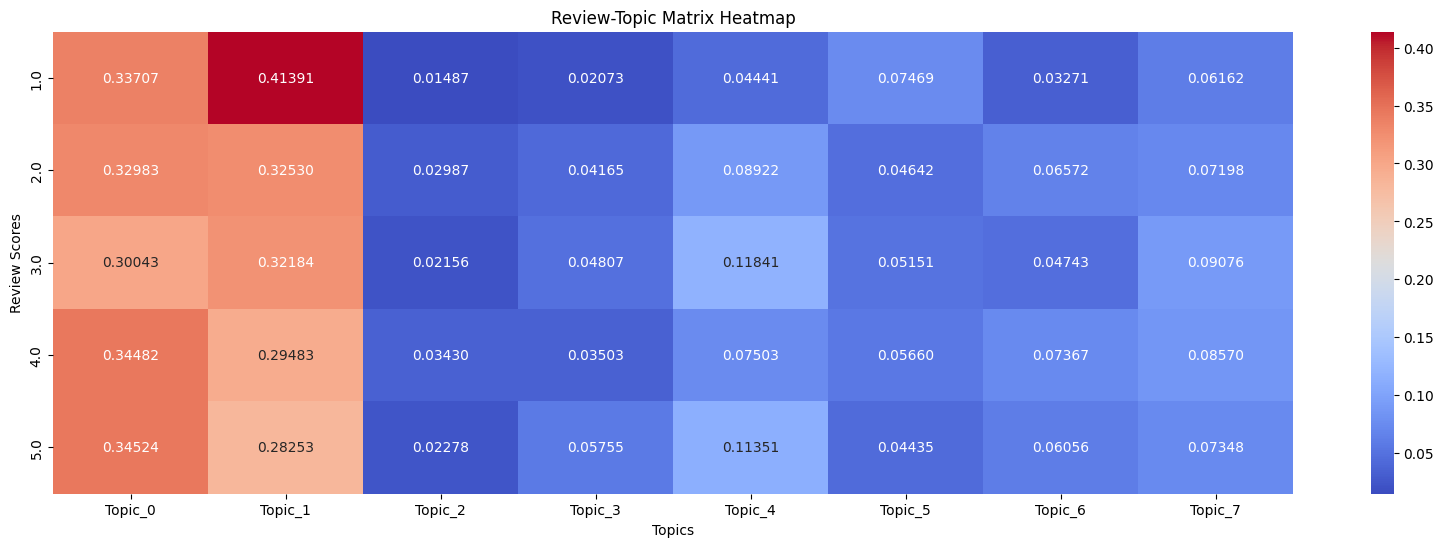

In [73]:
df01 = create_review_topic_matrix(final_sample, model, texts_bow, 8)


## Bigger subset

In [81]:
data2 = data[~data["text"].isna()]
data2 = data2[data2['text'].apply(lambda x: len(str(x).split()) > 10)]
sampled_per_rating = [data2[data2['rating'] == rating].sample(n=1, random_state=42) for rating in range(1, 6)]
required_samples = pd.concat(sampled_per_rating, axis=0)
remaining_samples = data.drop(required_samples.index).sample(n=50000 - len(required_samples), random_state=42)
final_sample = pd.concat([required_samples, remaining_samples], axis=0)
final_sample = final_sample[final_sample['text'].apply(lambda x: len(str(x).split()) > 10)]
print(final_sample['rating'].value_counts())

rating
5.0    16485
4.0     5198
1.0     4238
3.0     3689
2.0     2594
Name: count, dtype: int64


In [82]:
model, texts_bow, dictionary = LDA_training(final_sample, True, 8, 100, 100, 100)

Tokenization starting ---
Tokenization done
Numbers removed
Two letter words removed
Written-out numbers removed
Verbs removed SMALL
Lematization done
Stopwords removed
Choosed words removed
Bigrams done
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(23, 1), (24, 1), (25, 1)]]
Preprocessing done
--- Model starting ---
Średnia koherencja tematów: -3.7179.
Topic 0: large, much, definitely, though, daughter, however, better, money, piece, something
Topic 1: cute, super, pocket, smaller, side, warm, sleeve, super_cute, dark, best
Topic 2: bite, enough, use, around, light, weight, lot, compliment, many, earring
Topic 3: product, price, soft, review, could, gift, thing, star, buy, since
Topic 4: back, necklace, easy, waist, bracelet, item, exactly, head, actually, never
Topic 5: size, fit, great, would, color, small, nice, good, well, qu

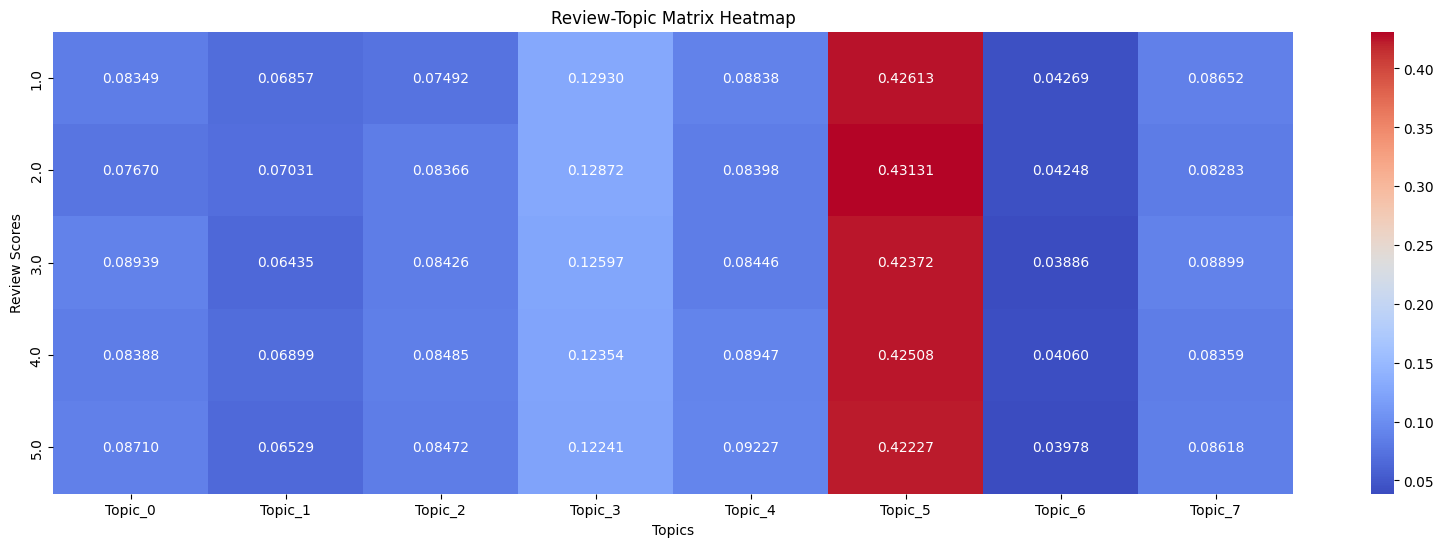

In [84]:
df01 = create_review_topic_matrix(final_sample, model, texts_bow, 8)


## Choosing with rate 1,2

In [100]:
# smaller for checking
data = pd.read_csv('../amazon_data/Amazon_Fashion.csv')
data = data[~data["text"].isna()]
data = data[data['rating'] <= 2]
data = data[data['text'].apply(lambda x: len(str(x).split()) > 10)]
data = data.sample(n=10000, random_state=42)


In [101]:
data.shape

(10000, 6)

In [102]:
model, texts_bow, dictionary = LDA_training(data, True, 8, 100, 100, 100)

Tokenization starting ---
Tokenization done
Numbers removed
Two letter words removed
Written-out numbers removed
Verbs removed SMALL
Lematization done
Stopwords removed
Choosed words removed
Bigrams done
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1)], [(14, 1), (15, 1), (16, 1), (17, 1), (18, 1)], [(19, 1), (20, 1), (21, 1), (22, 1)]]
Preprocessing done
--- Model starting ---
Średnia koherencja tematów: -2.4543.
Topic 0: product, money, waste, waste_money, away, inside, style, red, ever, tag
Topic 1: material, also, thin, extremely, waist, bad, sure, earring, area, review
Topic 2: would, time, back, disappoint, good, first, top, little, band, right
Topic 3: well, nice, black, belt, uncomfortable, hour, horrible, problem, able, lens
Topic 4: size, small, fit, way, large, could, return, big, short, tight
Topic 5: color, nothing, part, light, different, already, purchase, buy, wash, necklace
Topic 6: order, still, smal

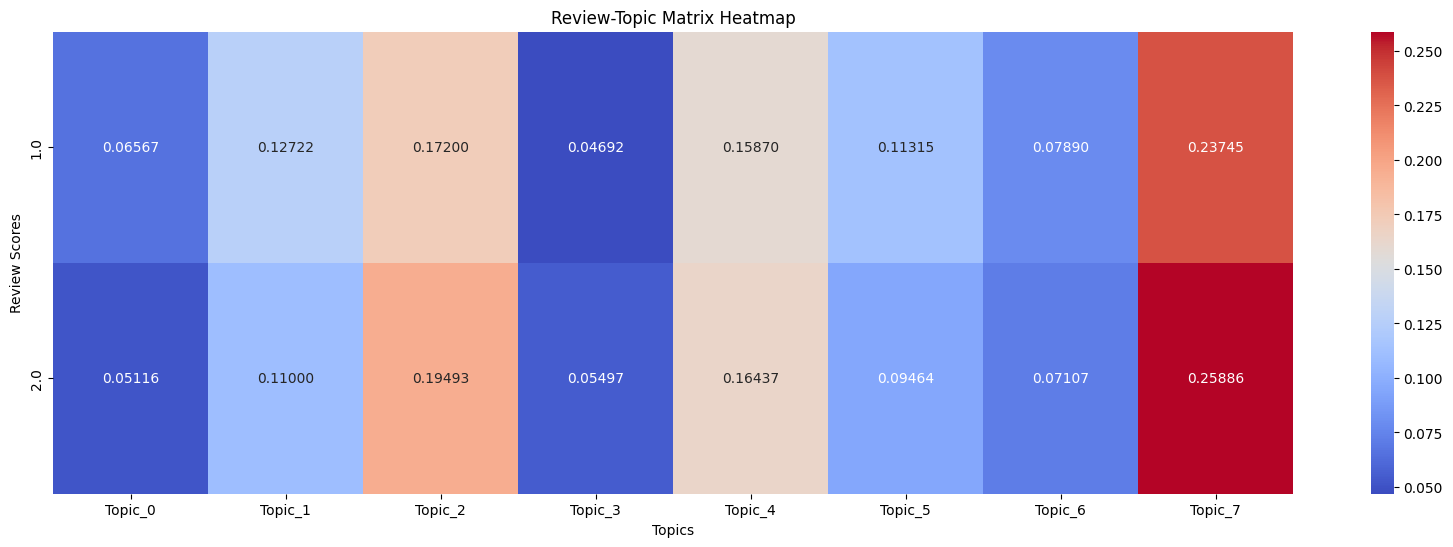

In [103]:
df01 = create_review_topic_matrix(data, model, texts_bow, 8)


In [104]:
model, texts_bow, dictionary = LDA_training(data, True, 5, 100, 100, 100)

Tokenization starting ---
Tokenization done
Numbers removed
Two letter words removed
Written-out numbers removed
Verbs removed SMALL
Lematization done
Stopwords removed
Choosed words removed
Bigrams done
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1)], [(14, 1), (15, 1), (16, 1), (17, 1), (18, 1)], [(19, 1), (20, 1), (21, 1), (22, 1)]]
Preprocessing done
--- Model starting ---
Średnia koherencja tematów: -2.6044.
Topic 0: worth, feel, box, wash, white, almost, chain, mask, bracelet, fine
Topic 1: size, small, would, fit, even, material, way, quality, color, cheap
Topic 2: money, never, waste, year, cheaply, side, zipper, old, belt, waste_money
Topic 3: time, day, first, well, band, week, pair, month, work, use
Topic 4: top, strap, apart, light, though, foot, already, package, sleeve, together


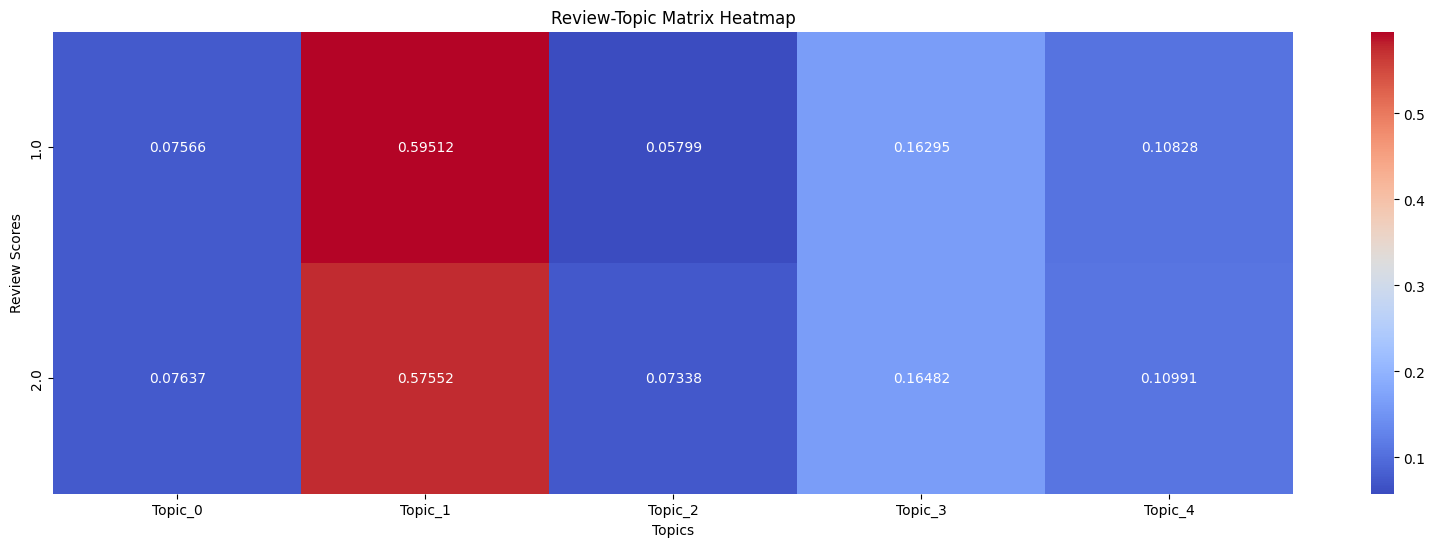

In [105]:
df01 = create_review_topic_matrix(data, model, texts_bow, 5)


#### again

In [85]:
model, texts_bow, dictionary = LDA_training(final_sample, True, 8, 100, 10, 100,1,10)

Tokenization starting ---
Tokenization done
Numbers removed
Two letter words removed
Written-out numbers removed
Verbs removed SMALL
Lematization done
Stopwords removed
Choosed words removed
Bigrams done
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(23, 1), (24, 1), (25, 1)]]
Preprocessing done
--- Model starting ---
Średnia koherencja tematów: -2.6179.
Topic 0: good, quality, time, product, much, even, back, day, could, pair
Topic 1: pretty, gift, chain, area, exactly, high, overall, vibrant, find, mask
Topic 2: price, review, beautiful, band, right, use, purchase, friend, glass, month
Topic 3: piece, compliment, many, earring, stay, new, ring, mine, cool, longer
Topic 4: large, happy, enough, bad, foot, away, pattern, snugly, christmas, clothe
Topic 5: long, short, daughter, length, strap, waist, side, warm, head, sleeve
Topic 6

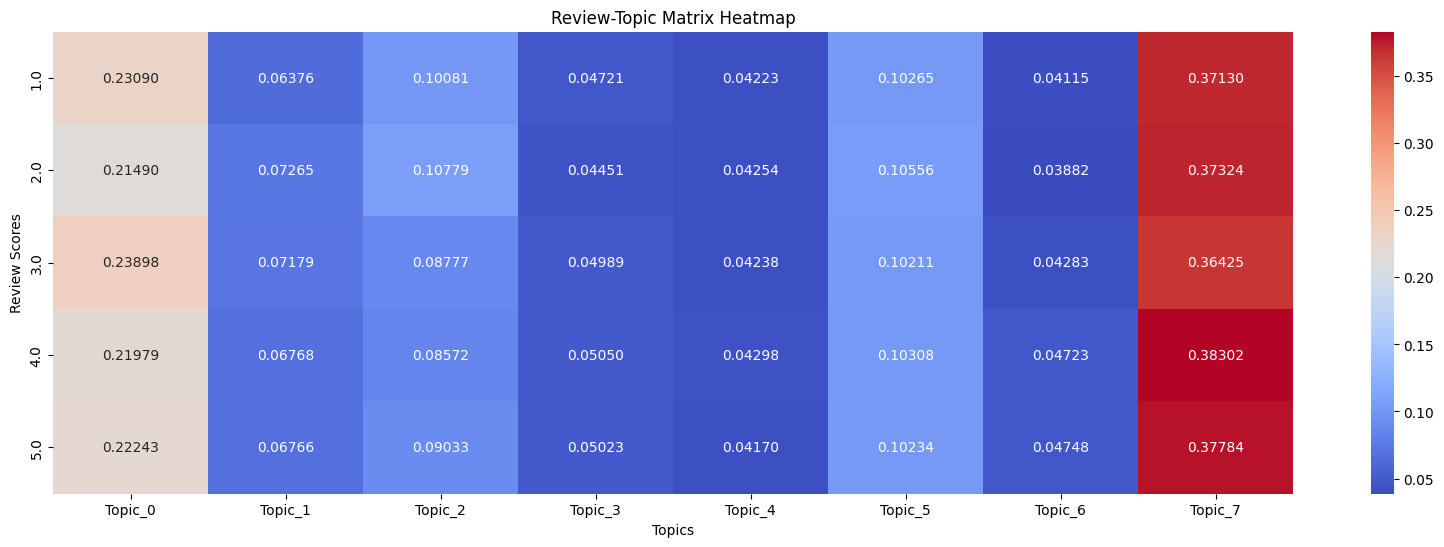

In [86]:
df01 = create_review_topic_matrix(final_sample, model, texts_bow, 8)


Different dataset

In [89]:
data2 = data[~data["text"].isna()]
data2 = data2[data2['text'].apply(lambda x: len(str(x).split()) > 10)]
sampled_per_rating = [data2[data2['rating'] == rating].sample(n=5000, random_state=42) for rating in range(1, 6)]
required_samples = pd.concat(sampled_per_rating, axis=0)
remaining_samples = data.drop(required_samples.index).sample(n=50000 - len(required_samples), random_state=42)
final_sample = pd.concat([required_samples, remaining_samples], axis=0)
final_sample = final_sample[final_sample['text'].apply(lambda x: len(str(x).split()) > 10)]
print(final_sample['rating'].value_counts())

rating
5.0    13276
4.0     7464
1.0     7082
3.0     6866
2.0     6244
Name: count, dtype: int64


In [ ]:
model, texts_bow, dictionary = LDA_training(final_sample, True, 8, 100, 10, 100,1,10)

#### Without removing rare and common words

In [79]:
model, texts_bow, dictionary = LDA_training(final_sample, True, 5, 100, 100, 100)

Tokenization starting ---
Tokenization done
Numbers removed
Two letter words removed
Written-out numbers removed
Verbs removed SMALL
Lematization done
Stopwords removed
Choosed words removed
Bigrams done
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(23, 1), (24, 1), (25, 1)]]
Preprocessing done
--- Model starting ---
Średnia koherencja tematów: -2.3597.
Topic 0: size, great, fit, nice, color, material, little, comfortable, perfect, also
Topic 1: day, right, piece, necklace, money, front, hard, every, seller, thank
Topic 2: item, easy, use, light, bad, thick, probably, mask, weight, blue
Topic 3: would, quality, well, good, really, cute, time, price, love, much
Topic 4: small, large, pretty, big, way, back, year, daughter, perfectly, old


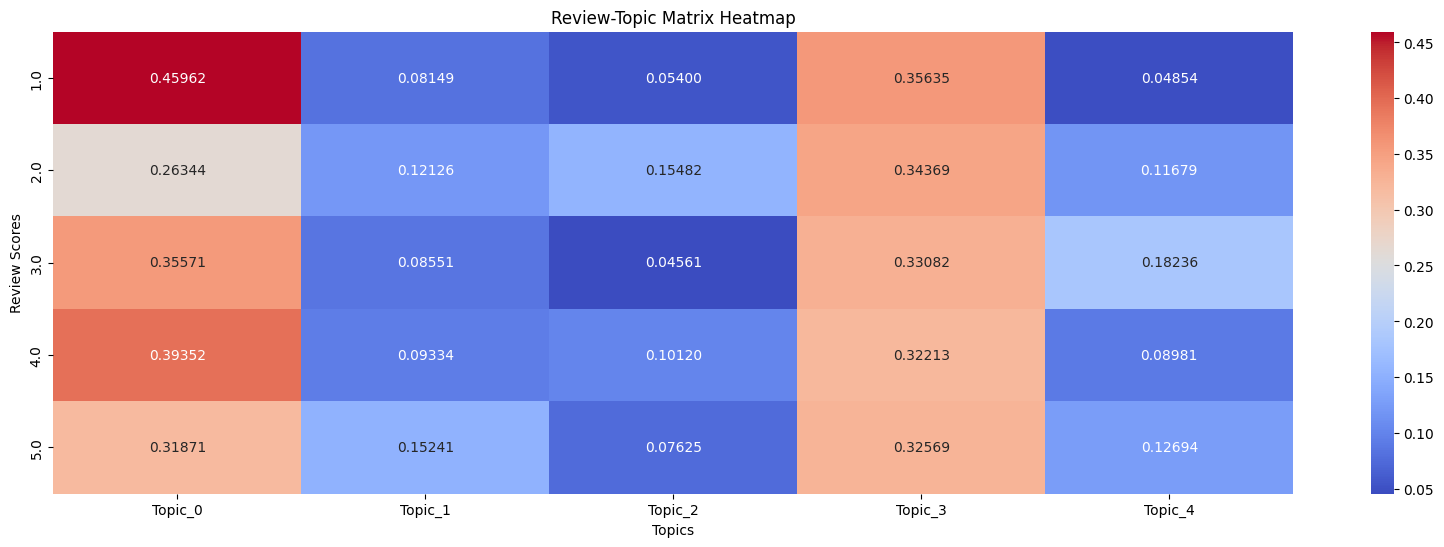

In [80]:
df01 = create_review_topic_matrix(final_sample, model, texts_bow, 5)


#### again

In [12]:
model, texts_bow, dictionary = LDA_training(data, False, 15, 100, 1, 200)

Tokenization starting ---
Tokenization done
Numbers removed
Two letter words removed
Written-out numbers removed
Verbs removed
Lematization done
Stopwords removed
Bigrams done
Common and rare words removed
[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 3), (32, 2), (33, 1), (34, 1)], [(12, 1), (14, 1), (16, 1), (17, 2), (22, 1), (25, 1), (27, 2), (31, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 3), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 1), (75, 1), (76, 1), (77, 1), (78, 3), (79, 1), (80, 1),

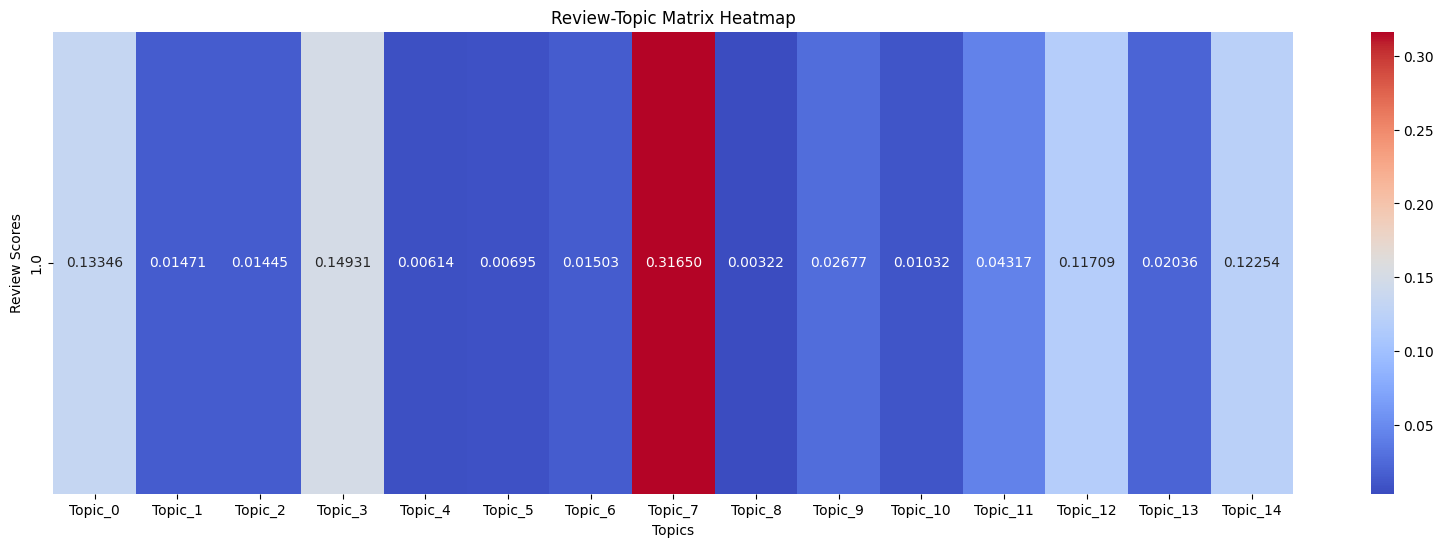

In [13]:
df0 = create_review_topic_matrix(data, model, texts_bow, 15)


## Subset, in which every rating is present -p2

In [27]:
data2 = data[~data["text"].isna()]
data2 = data2[data2['text'].apply(lambda x: len(str(x).split()) > 10)]
sampled_per_rating = [data2[data2['rating'] == rating].sample(n=1, random_state=42) for rating in range(1, 6)]
required_samples = pd.concat(sampled_per_rating, axis=0)
remaining_samples = data.drop(required_samples.index).sample(n=10000 - len(required_samples), random_state=42)
final_sample = pd.concat([required_samples, remaining_samples], axis=0)
final_sample = final_sample[final_sample['text'].apply(lambda x: len(str(x).split()) > 10)]
print(final_sample['rating'].value_counts())

rating
5.0    32766
4.0    10377
1.0     8524
3.0     7415
2.0     5147
Name: count, dtype: int64


In [19]:
data2

,rating,text,parent_asin,timestamp,rating_number,average_rating
0,5.0,I think this locket is really pretty. The insi...,B00LOPVX74,2020-01-09 00:06:34.489,45,4.177778
1,5.0,Great,B07B4JXK8D,2020-12-20 01:04:06.701,422,3.917062
2,2.0,One of the stones fell out within the first 2 ...,B007ZSEQ4Q,2015-05-23 01:33:48.000,16,3.250000
3,1.0,Crappy socks. Money wasted. Bought to wear wit...,B07F2BTFS9,2018-12-31 20:57:27.095,39,4.102564
4,5.0,I LOVE these glasses! They fit perfectly over...,B00XESJTDE,2015-08-13 14:29:26.000,25,4.080000
...,...,...,...,...,...,...
2475448,5.0,Great quality. Sturdy and tight. Came on time....,B00YGFMQC0,2016-09-18 14:01:58.000,177,4.576271
2475449,5.0,The tie tacks were the size that allowed them ...,B00YGFMQC0,2016-06-24 20:12:38.000,177,4.576271
2475450,1.0,Says ten tie clips but o only received 7.,B00YGFMQC0,2018-05-08 17:05:05.585,177,4.576271
2475451,3.0,When I received them 2-3 of them did not open ...,B00YGFMQC0,2016-12-17 22:28:31.000,177,4.576271


In [28]:
model2, texts_bow2, dictionary2 = LDA_training(final_sample, False, 15, 100, 1, 200)

Tokenization starting ---
Tokenization done
Numbers removed
Two letter words removed
Written-out numbers removed
Verbs removed
Lematization done
Stopwords removed
Bigrams done
Common and rare words removed
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)], [(2, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)], [(32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1)]]
Preprocessing done
--- Model starting ---
Średnia koherencja tematów: -2.8139.
Topic 0: watch, since, always, set, several, show, half, pack, change, figure
Topic 1: wash, perfectly, different, fit_perfectly, seem, true, zipper, photo, belt, bad
Topic 2: fit, like, size, great, look, order, dress, would, well, color
Topic 3: top, super, easy, work, pant, feel, take, fine, bottom, line
Topic 4: fabric, return, however, stretch, problem, skirt, 

In [55]:
from codes.LDA import generate_topic_rating_matrix_OKE
df = create_review_topic_matrix(final_sample, model2, texts_bow2, 15)


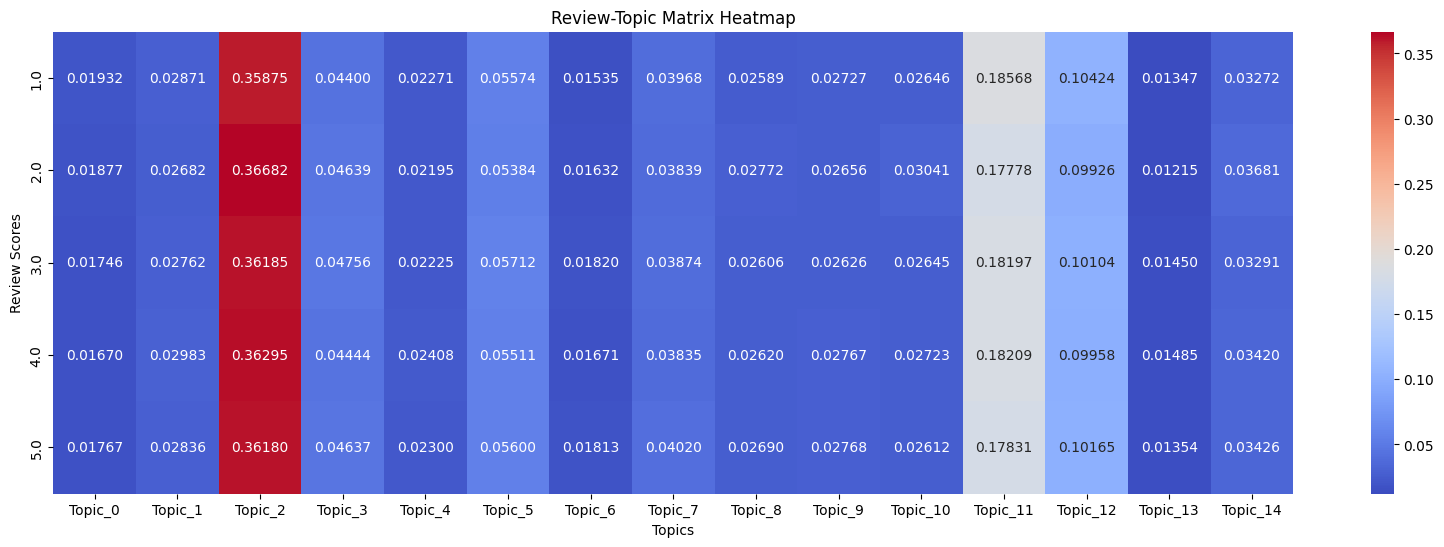

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sns.heatmap(df, annot=True, fmt=".5f", cmap="coolwarm", cbar=True)
plt.title("Review-Topic Matrix Heatmap")
plt.xlabel("Topics")
plt.ylabel("Review Scores")
plt.show()

In [36]:
if final_sample['text'].isnull().any():
    print("Warning: Some rows have NaN values in 'text' column. Replacing NaN with empty strings.")


In [37]:
svm, vectorizer, df_with_topics_and_words = lda_and_svm_pipeline(final_sample, model2, texts_bow2)

---Begining SVM---
--Classification starting---
---Train test splitting---
---SVM training---
---SVM predicting---
---Classification Report:---

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.99      1.00      0.99     12672
           3       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         2
          11       0.66      0.59      0.63       153
          12       0.60      0.19      0.29        16
          14       0.00      0.00      0.00         1

    accuracy                           0.99     12846
   macro avg       0.46      0.40      0.42     12846
weighted avg       0.99      0.99      0.99     12846



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [39]:
df_with_topics_and_words.head()

,rating,text,parent_asin,timestamp,rating_number,average_rating,assigned_topic,top_words
579098,1.0,"I am sending it back, the clasp keeps coming o...",B00SFTU6BG,2016-09-20 19:12:07.000,37,4.432432,2,"fit, like, size, great, look, order, dress, wo..."
824355,2.0,Loose peasant styles were all the thing when I...,B07Z3BGTN9,2020-01-16 01:43:14.567,1,2.000000,2,"fit, like, size, great, look, order, dress, wo..."
541961,3.0,I do not like that the shirt is not free-flowi...,B09DYGBDYP,2022-01-06 23:27:03.854,2,4.000000,2,"fit, like, size, great, look, order, dress, wo..."
2347334,4.0,It’s cute and it looks a little cheap but real...,B07SVXRG21,2020-02-02 16:00:32.337,21,3.952381,2,"fit, like, size, great, look, order, dress, wo..."
545366,5.0,Absolutely gorgeous. Wearing the Galaxy on my ...,B01FWWMIF0,2017-03-19 06:40:40.000,60,4.050000,2,"fit, like, size, great, look, order, dress, wo..."


In [51]:
from codes.LDA import generate_topic_rating_matrix_OKE
topic_rating_matrix = generate_topic_rating_matrix_OKE(df_with_topics_and_words, 15)

In [52]:
print(topic_rating_matrix)

    Topic_0  Topic_1   Topic_2   Topic_3   Topic_4   Topic_5  Topic_6  \
1  0.000000      0.0  0.984632  0.000235  0.000117  0.000117      0.0   
2  0.000194      0.0  0.987177  0.000000  0.000000  0.000194      0.0   
3  0.000135      0.0  0.991504  0.000135  0.000000  0.000135      0.0   
4  0.000000      0.0  0.991423  0.000096  0.000000  0.000289      0.0   
5  0.000000      0.0  0.988097  0.000153  0.000000  0.000153      0.0   

    Topic_7   Topic_8  Topic_9  Topic_10  Topic_11  Topic_12  Topic_13  \
1  0.000117  0.000000      0.0       0.0  0.012201  0.002581       0.0   
2  0.000000  0.000000      0.0       0.0  0.009909  0.002526       0.0   
3  0.000000  0.000000      0.0       0.0  0.007822  0.000270       0.0   
4  0.000000  0.000000      0.0       0.0  0.007517  0.000675       0.0   
5  0.000000  0.000031      0.0       0.0  0.010987  0.000549       0.0   

   Topic_14  
1  0.000000  
2  0.000000  
3  0.000000  
4  0.000000  
5  0.000031  


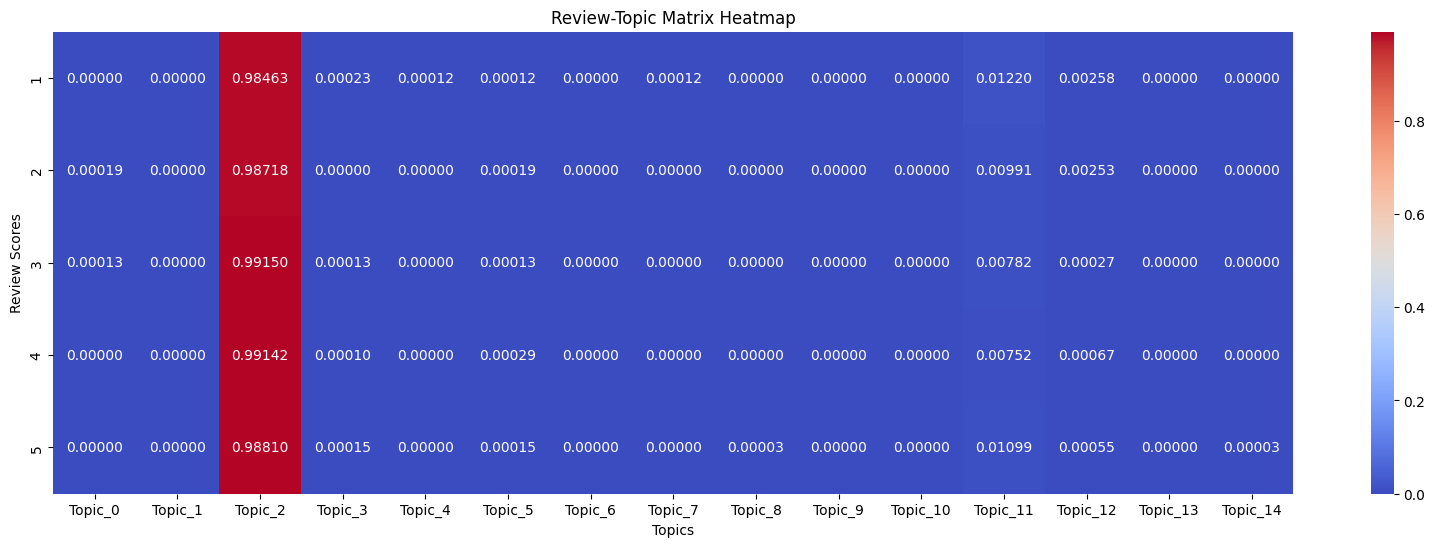

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sns.heatmap(topic_rating_matrix, annot=True, fmt=".5f", cmap="coolwarm", cbar=True)
plt.title("Review-Topic Matrix Heatmap")
plt.xlabel("Topics")
plt.ylabel("Review Scores")
plt.show()

In [57]:
texts_bow2

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1)],
 [(2, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1)],
 [(32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1)],
 [(26, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 2),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1)],
 [(10, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1)],
 [(3, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(26, 1),
  (35, 1),
  (53, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 2),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1)],
 [(10, 1),
  (21, 2),
  (26, 1),
  (44, 1),
  (58, 3),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 3),
  (79, 1),
  (

# Explanation of visualizations

Circles:
- Bigger ones: the topics which are more dominant in a corpus (for example are in a bigger number of texts or are more meaningful)
- Smaller ones: ......................less ................... 

Red and blue diagrams:
- Blue (Overall term frequency): frequency of words in all texts (independent from topics)
- Red (Estimated term frequency with the selected topic):  frequency of words the selected topic

# Topic modeling with classification

# classification supervised

In [8]:
from codes.LDA import LDA_training
model,texts_bow, dictionary = LDA_training(data, n_topics=15, with_certain_words_removal=False, iterations=200, passes=10, chunksize=500)

Tokenization starting ---
Tokenization done
[['the', 'photo', 'doesn', 't', 'show', 'this', 'but', 'you', 'need', 'a', 'college', 'degree', 'to', 'wrap', 'this', 'and', 'the', 'wraps', 'are', 'a', 'cheap', 'braided', 'cotton', 'strip', 'not', 'self', 'material', 'looks', 'just', 'awful', 'on', 'it', 'an', 'awkward', 'fit', 'and', 'awkward', 'look', 'if', 'you', 'can', 'figure', 'it', 'out', 'the', 'photos', 'show', 'the', 'model', 'with', 'the', 'jacket', 'open', 'and', 'it', 's', 'just', 'not', 'possible', 'with', 'those', 'ties', 'if', 'i', 'could', 'rate', 'zero', 'i', 'would', 'it', 'would', 'have', 'been', 'so', 'cool', 'if', 'they', 'would', 'have', 'just', 'made', 'a', 'nice', 'loose', 'jacket', 'with', 'a', 'zipper', 'sheesh', 'if', 'you', 'are', 'determined', 'i', 'had', 'considered', 'sizing', 'up', 'because', 'it', 'was', 'sort', 'of', 'odd', 'but', 'i', 'do', 'not', 'recommend', 'sizing', 'up'], ['i', 'am', '5', '8', '38ddd', 'usually', 'wear', 'a', '14', '16', 'or', '0x', 

In [9]:
from codes.LDA import lda_and_svm_pipeline
svm, vectorizer, lda_model, df_with_topics_and_words = lda_and_svm_pipeline(data,model, texts_bow)



--Classification starting---
Preparing data for SVM
Train test splitting
---SVM training---
---SVM predicting---
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.54      0.39      0.45        38
           3       0.65      0.60      0.63        85
           6       0.42      0.37      0.39        27
           7       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         4
          10       1.00      0.14      0.25         7
          11       0.77      0.63      0.69       288
          12       0.86      0.94      0.90      1101
          13       0.62      0.35      0.44        23
          14       0.67      0.33      0.44         6

    accuracy                           0.82      1583
   macro avg       0.50      0.34      0.38      1583
weighted avg       0.81      0.82      0.81      1583



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [ ]:
print(df_with_topics_and_words[['text', 'assigned_topic', 'top_words']])

# Working on whole data

In [168]:
data = data[~data["text"].isna()]
data.shape

(2474367, 6)

In [139]:
texts_bow, dictionary, id2token = preprocess_text(data, with_certain_words_removal=False)

Tokenization starting ---
Tokenization done
Numbers removed
One letter words removed
Written-out numbers removed
Lematization done
Stopwords removed
Bigrams done
Common and rare words removed
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 2)], [(27, 1)], [(28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1)]]
Preprocessing done


removing verbs

In [172]:
texts_bow_nv, dictionary_nv, id2token_nv = preprocess_text(data, with_certain_words_removal=True)

Tokenization starting ---
Tokenization done
Numbers removed
Two letter words removed
Written-out numbers removed
Verbs removed
Lematization done
Stopwords removed
Choosed words removed
Bigrams done
Common and rare words removed
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1)], [(23, 1)], [(24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1)]]
Preprocessing done


In [173]:
modelBIG_nv, texts_bowBIG_nv, dictionaryBIG_nv  = LDA_training(data, n_topics=15, iterations=60, passes = 1, texts_bow=texts_bow_nv, dictionary=dictionary_nv, id2word=id2token_nv)

--- Model starting ---
Średnia koherencja tematów: -2.7156.
Topic 0: strap, pocket, zipper, inside, wallet, hold, purse, suit, card, pack
Topic 1: love, great, fit, buy, look, perfect, color, well, make, comfortable
Topic 2: time, come, break, day, first, use, band, money, month, give
Topic 3: glass, every, face, case, sunglass, lens, sturdy, durable, nose, eye
Topic 4: cute, super, costume, cool, night, lightweight, summer, fun, hot, cap
Topic 5: good, quality, nice, product, price, recommend, awesome, excellent, high, highly
Topic 6: warm, fast, stay, ear, foot, boot, hair, coat, trip, winter
Topic 7: belt, leather, tie, add, stitch, simple, cotton, solid, remove, include
Topic 8: gift, necklace, ring, piece, bracelet, chain, send, friend, christmas, real
Topic 9: receive, lot, compliment, many, describe, many_compliment, horrible, complaint, job, lot_compliment
Topic 10: cheap, light, black, weight, blue, white, red, stylish, pink, dark
Topic 11: arrive, earring, ship, worth, packag

In [174]:
vis = display_visuals_LDA(modelBIG_nv, texts_bowBIG_nv, dictionaryBIG_nv)
pyLDAvis.display(vis)

In [ ]:
modelBIG, texts_bowBIG, dictionaryBIG  = LDA_training(data, n_topics=15, iterations=100)

Tokenization starting ---
Tokenization done
Numbers removed
One letter words removed
Written-out numbers removed
Lematization done
Stopwords removed
Bigrams done
Common and rare words removed
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 2)], [(27, 1)], [(28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1)]]
Preprocessing done
--- Model starting ---
Średnia koherencja tematów: -2.6636.
Topic 0: fit, size, order, small, little, big, way, large, shirt, wear
Topic 1: necklace, fast, chain, cool, purse, suit, silver, jewelry, value, key
Topic 2: love, buy, perfect, comfortable, daughter, soft, perfectly, absolutely, light, thank
Topic 3: pair, shoe, sock, belt, foot, boot, walk, support, heel, buckle
Topic 4: br, wash, dry, house, expectation, sweat, shrink, exchange, review, sleep

In [156]:
modelBIG2,texts_bowBIG2, dictionaryBIG2 = LDA_training(data, n_topics=15, iterations=50, passes=1, texts_bow=texts_bow, dictionary=dictionary, id2word=id2token )

--- Model starting ---
Średnia koherencja tematów: -2.6974.
Topic 0: pair, shoe, sock, send, every, foot, poor, boot, walk, send_back
Topic 1: size, order, small, little, big, large, bite, run, year, tight
Topic 2: like, look, would, make, really, material, expect, picture, pretty, much
Topic 3: wash, warm, fast, apart, fell, advertise, pin, sweater, water, dry
Topic 4: bag, strap, pocket, belt, zipper, leather, wallet, purse, durable, card
Topic 5: come, use, work, get, back, give, need, go, keep, put
Topic 6: dress, long, top, fabric, short, length, bottom, waist, arm, cut
Topic 7: gift, earring, necklace, piece, package, bracelet, chain, set, friend, costume
Topic 8: time, break, watch, first, money, light, ship, worth, month, week
Topic 9: black, color, blue, white, describe, red, green, print, pink, dark
Topic 10: good, quality, nice, product, price, shirt, arrive, design, awesome, overall
Topic 11: love, fit, great, wear, buy, get, perfect, well, cute, color
Topic 12: glass, hat,

In [157]:
vis = display_visuals_LDA(modelBIG2, texts_bowBIG2, dictionaryBIG2)
pyLDAvis.display(vis)

# For the lab docs

In [4]:
data = data[~data["text"].isna()]
data = data[data['text'].apply(lambda x: len(str(x).split()) > 10)]
sampled_per_rating2 = [data[data['rating'] == rating].sample(n=1, random_state=42) for rating in range(1, 6)]
required_samples2 = pd.concat(sampled_per_rating2, axis=0)
remaining_samples2 = data.drop(required_samples2.index).sample(n=500000 - len(required_samples2), random_state=42)
final_sample2 = pd.concat([required_samples2, remaining_samples2], axis=0)
final_sample2 = final_sample2[final_sample2['text'].apply(lambda x: len(str(x).split()) > 10)]
print(final_sample2['rating'].value_counts())

rating
5.0    255313
4.0     79706
1.0     66106
3.0     57909
2.0     40966
Name: count, dtype: int64


In [67]:
texts_bowL, dictionaryL, id2tokenL = preprocess_text(final_sample2, with_certain_words_removal=True)

Tokenization starting ---
Tokenization done
Numbers removed
Two letter words removed
Written-out numbers removed
Verbs removed
Lematization done
Stopwords removed
Choosed words removed
Bigrams done
Common and rare words removed
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(2, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(31, 1), (32, 1), (33, 1), (34, 1)]]
Preprocessing done


In [80]:
modelL, texts_bowL, dictionaryL = LDA_training(final_sample2, n_topics=15, chunksize=1000, passes = 10, iterations = 200, 
                                               texts_bow=texts_bowL, dictionary= dictionaryL, id2word=id2tokenL)

--- Model starting ---
Średnia koherencja tematów: -2.6801.
Topic 0: glass, earring, ring, face, mask, ear, case, lose, lens, one
Topic 1: beautiful, gift, give, star, necklace, bracelet, friend, silver, stone, reason
Topic 2: product, receive, review, light, disappoint, item, say, without, weight, never
Topic 3: compliment, many, fall, boot, purse, neck, house, casual, everyday, lace
Topic 4: head, bad, hair, half, pin, guess, weird, fact, else, men
Topic 5: year, daughter, old, son, year_old, super_cute, outfit, glove, kid, waste
Topic 6: lot, pocket, true, every, read, true_size, wallet, carry, card, night
Topic 7: time, day, use, first, foot, try, month, take, money, last
Topic 8: great, look, good, well, nice, quality, really, make, price, purchase
Topic 9: come, break, strap, arrive, piece, open, package, easily, inside, zipper
Topic 10: pair, warm, send, tie, cold, jean, smell, wrong, winter, send_back
Topic 11: fit, love, size, buy, order, color, material, perfect, comfortable,

In [81]:
dfL = create_review_topic_matrix(final_sample2, modelL, texts_bowL, 15)


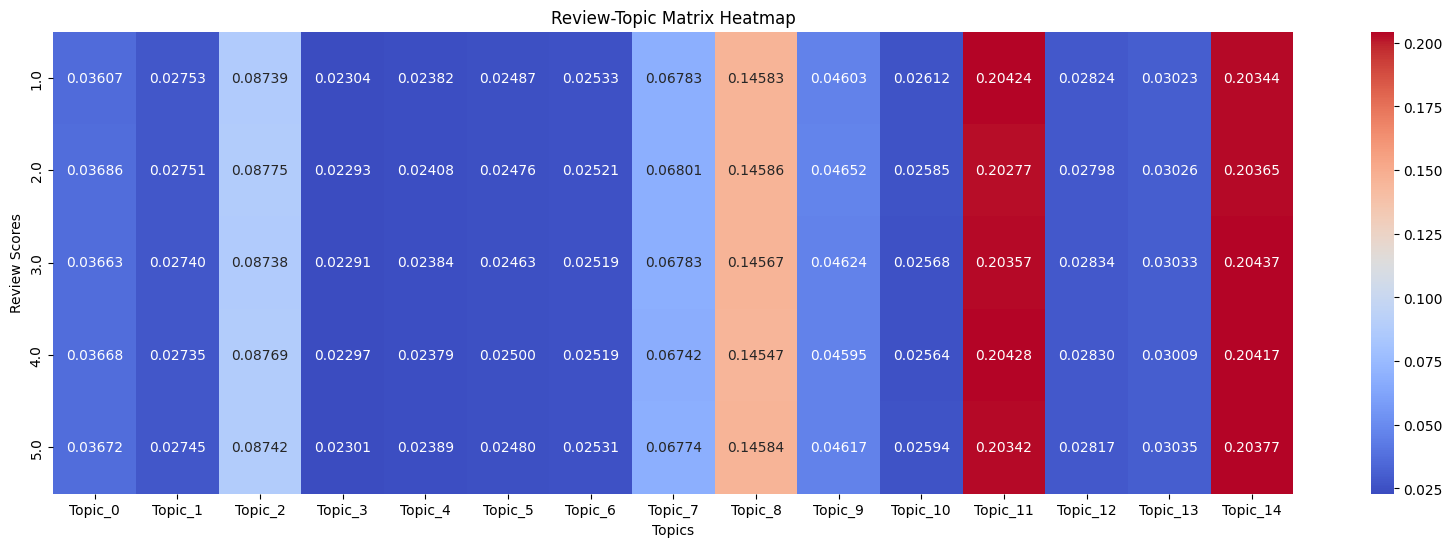

In [82]:
plt.figure(figsize=(20, 6))
sns.heatmap(dfL, annot=True, fmt=".5f", cmap="coolwarm", cbar=True)
plt.title("Review-Topic Matrix Heatmap")
plt.xlabel("Topics")
plt.ylabel("Review Scores")
plt.show()

#### Different params

In [5]:
texts_bowL2, dictionaryL2, id2tokenL2 = preprocess_text(final_sample2, with_certain_words_removal=False)

Tokenization starting ---
Tokenization done
Numbers removed
Two letter words removed
Written-out numbers removed
Verbs removed
Lematization done
Stopwords removed
Bigrams done
Common and rare words removed
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)], [(2, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)], [(33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1)]]
Preprocessing done


In [6]:
modelL2, texts_bowL2, dictionaryL2 = LDA_training(final_sample2, n_topics=15, chunksize=1000, passes = 2, iterations = 300, 
                                               texts_bow=texts_bowL2, dictionary= dictionaryL2, id2word=id2tokenL2)

--- Model starting ---
Średnia koherencja tematów: -2.5283.
Topic 0: year, daughter, old, earring, necklace, son, year_old, highly, highly_recommend, kid
Topic 1: around, light, hat, star, belt, weight, head, ear, heavy, tie
Topic 2: back, first, money, send, second, hole, seller, waste, pad, send_back
Topic 3: ring, fall, place, lose, apart, fell, stone, hair, description, update
Topic 4: watch, band, break, many, month, week, already, couple, adjust, metal
Topic 5: love, buy, color, get, purchase, product, come, pair, beautiful, receive
Topic 6: perfect, comfortable, soft, wash, lot, pant, warm, compliment, dry, summer
Topic 7: fit, size, order, small, large, big, way, return, medium, tight
Topic 8: review, mask, read, stitch, seam, smell, wrong, uncomfortable, see, exchange
Topic 9: day, wear, time, use, shoe, work, sock, easy, foot, need
Topic 10: dress, top, long, short, fabric, length, enough, waist, strap, bottom
Topic 11: bag, pocket, purse, wallet, carry, card, quickly, phone,

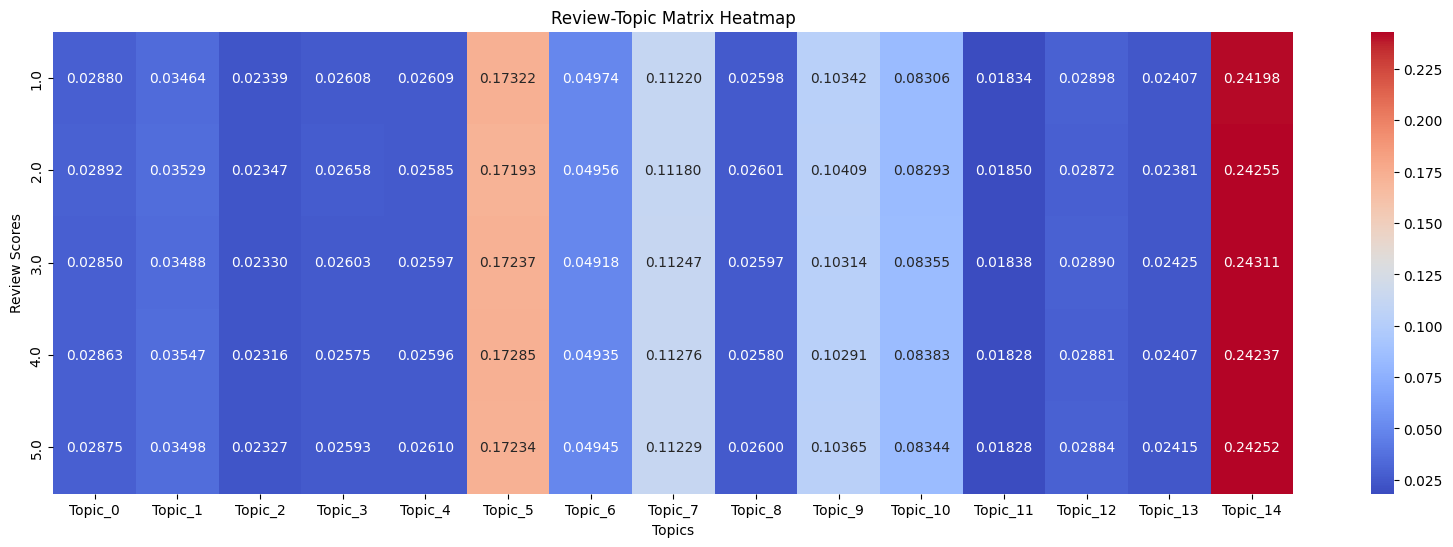

In [7]:
dfL2 = create_review_topic_matrix(final_sample2, modelL2, texts_bowL2, 15)


In [8]:
modelL3, texts_bowL3, dictionaryL3 = LDA_training(final_sample2, n_topics=15, chunksize=500, passes = 1, iterations = 300, 
                                               texts_bow=texts_bowL2, dictionary= dictionaryL2, id2word=id2tokenL2)

--- Model starting ---
Średnia koherencja tematów: -2.8809.
Topic 0: break, easy, strap, overall, stay, easily, inside, part, wrist, super_cute
Topic 1: cheap, light, money, weight, fall, heavy, plastic, costume, nothing, cotton
Topic 2: product, come, back, go, return, receive, definitely, gift, review, purchase
Topic 3: good, work, glass, without, new, hard, head, face, shape, case
Topic 4: time, watch, day, use, band, first, month, last, since, week
Topic 5: piece, true, bracelet, necklace, set, chain, box, true_size, neck, add
Topic 6: shoe, sock, foot, high, worth, blue, boot, please, purse, kind
Topic 7: picture, earring, show, white, mask, place, body, person, print, stretchy
Topic 8: bag, pocket, bra, zipper, cover, ear, win, skirt, jacket, nicely
Topic 9: wash, want, warm, keep, always, dry, lightweight, hang, night, cold
Topic 10: fit, like, size, order, would, look, dress, small, nice, really
Topic 11: love, great, buy, color, quality, get, wear, material, perfect, comfortab

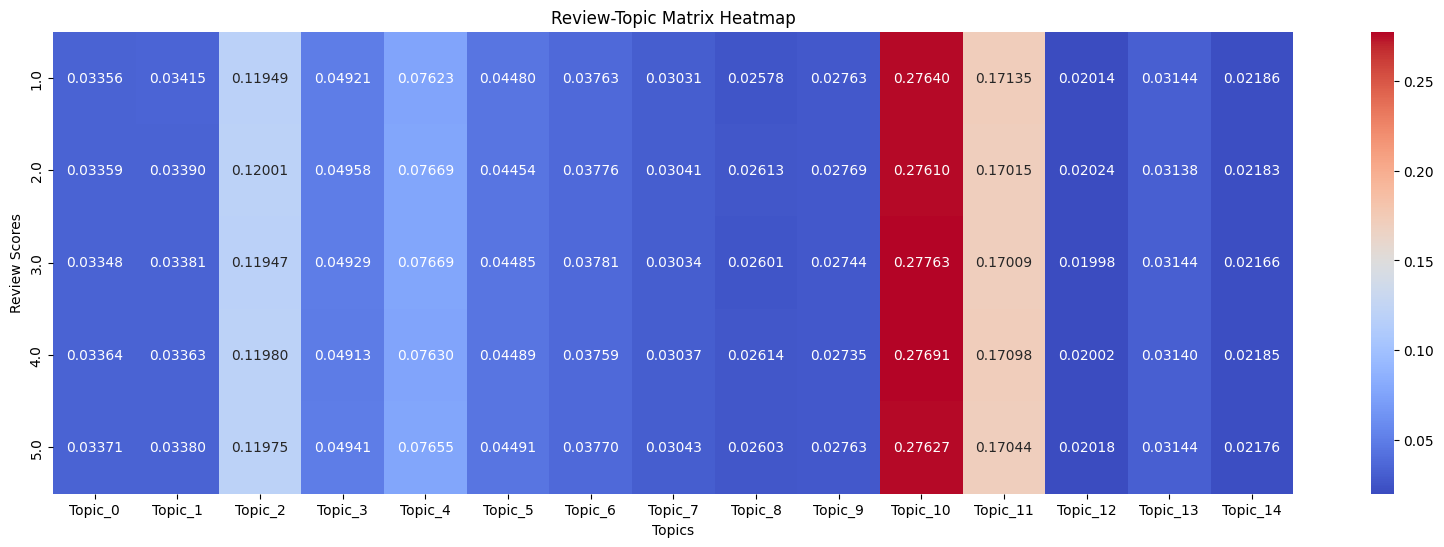

In [9]:
dfL3 = create_review_topic_matrix(final_sample2, modelL3, texts_bowL3, 15)
